### Basic Steps

In [ ]:
# Importing the used modules. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data loading

In [ ]:
# Reading and  the datasets as csv files.
dataset = pd.read_csv('./flight_delay.csv')

dataset

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0
...,...,...,...,...,...
675508,SVO,2018-08-31 23:50:00,SVX,2018-09-01 02:10:00,0.0
675509,LED,2018-08-31 23:50:00,SVO,2018-09-01 01:10:00,0.0
675510,SVO,2018-08-31 23:55:00,EGO,2018-09-01 01:20:00,0.0
675511,SVO,2018-08-31 23:55:00,TSE,2018-09-01 03:15:00,0.0


#### Splitting the dataset into features and target.

In [ ]:
x, y = dataset.loc[:, :'Scheduled arrival time'], dataset[['Delay']]

In [ ]:
x.isna().sum()

Depature Airport           0
Scheduled depature time    0
Destination Airport        0
Scheduled arrival time     0
dtype: int64

In [ ]:
x.head(10)

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00
5,HAM,2015-10-27 14:30:00,SVO,2015-10-27 17:15:00
6,SVO,2015-10-27 14:35:00,JFK,2015-10-28 01:25:00
7,DXB,2015-10-27 15:40:00,SVO,2015-10-27 21:20:00
8,SVO,2015-10-27 16:10:00,VVO,2015-10-28 00:35:00
9,TLV,2015-10-27 16:45:00,SVO,2015-10-27 20:55:00


In [ ]:
y.head(10)

,Delay
0,0.0
1,2.0
2,0.0
3,0.0
4,9.0
5,0.0
6,0.0
7,1.0
8,0.0
9,0.0


In [ ]:
types = x.dtypes
print("Number categorical featues:", sum(types=='object'))
print(types)

Number categorical featues: 4
Depature Airport           object
Scheduled depature time    object
Destination Airport        object
Scheduled arrival time     object
dtype: object


In [ ]:
x.describe()

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time
count,675513,675513,675513,675513
unique,179,266212,177,271877
top,SVO,2017-02-20 01:40:00,SVO,2018-07-06 17:45:00
freq,336929,8,336730,10


In [ ]:
y.describe()

,Delay
count,675513.000000
mean,9.912939
std,44.895875
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,1436.000000


In [ ]:
print(dataset.isna().sum())

Depature Airport           0
Scheduled depature time    0
Destination Airport        0
Scheduled arrival time     0
Delay                      0
dtype: int64


### Data Preprocessing

Since all the features columns represent objects, we need to find a way to convert them into numeral values. 

- We decided to use one hot encoding with the **departure and destination airports**. Since there is no explicit relation or order between the different airports, i.e. the airports are non-ordinal, one hot encoding is the best strategy to use. 

- For the **scheduled departure times**, we decided to do the following: the *year* part does not have that much of an effect, thus, it is disregard. Moreover, the month and day are represented in a single column called "day order" which ranges from 1 to 365. The time (hours and minutes) is represented again in a single column called (minute order) which ranges from 1 to 24 * 60 = 1440. 

- Finally for hanlding the **scheduled arrival time**, it is enough to represent it as a single column (flight duration) which is simply the difference in minutes between the departure and arrival times. 

#### Splitting the data into training and testing set

This step is done now because we are using one hot encoder which is affected if it has access to the testing data. 

In [ ]:
start_date = "2018-01-01 00:00:00"
xy_train = dataset[(dataset['Scheduled depature time'] < start_date)]
xy_test = dataset[(dataset['Scheduled depature time'] >= start_date)]

x_train, y_train = xy_train.drop(['Delay'], axis=1, inplace=False), xy_train[['Delay']]
x_test, y_test = xy_test.loc[:, :'Scheduled arrival time'], xy_test[['Delay']]
x_train

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00
...,...,...,...,...
499057,SVO,2017-12-31 22:50:00,MLE,2018-01-01 07:35:00
499058,JFK,2017-12-31 22:20:00,SVO,2018-01-01 07:10:00
499164,SVO,2017-12-31 13:50:00,VOZ,2017-12-31 15:05:00
499168,SVO,2017-12-31 15:10:00,EGO,2017-12-31 16:35:00


In [ ]:
print(x_train.isna().sum())
print(x_test.isna().sum())
x_train.describe()

Depature Airport           0
Scheduled depature time    0
Destination Airport        0
Scheduled arrival time     0
dtype: int64
Depature Airport           0
Scheduled depature time    0
Destination Airport        0
Scheduled arrival time     0
dtype: int64


,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time
count,499062,499062,499062,499062
unique,169,202326,167,206661
top,SVO,2016-11-30 01:40:00,SVO,2017-10-22 01:00:00
freq,249064,8,248924,9


#### One hot encoding the airports

In [ ]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures

ohe_feats = ['Depature Airport', 'Destination Airport']
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(x_train[ohe_feats])

def ohe_new_features(df, features_name, ohe):
    new_feats = ohe.transform(df[features_name])
    new_cols = pd.DataFrame(new_feats, dtype=int, index=df.index, columns=ohe.get_feature_names(features_name))
    # display(new_cols)
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df


x_train = ohe_new_features(x_train, ohe_feats, ohe)
x_test =  ohe_new_features(x_test, ohe_feats, ohe)



In [ ]:
x.isna().sum().sum()

0

In [ ]:
x_train

,Scheduled depature time,Scheduled arrival time,Depature Airport_AAQ,Depature Airport_ABA,Depature Airport_AER,Depature Airport_AGP,Depature Airport_AKX,Depature Airport_ALA,Depature Airport_ALC,Depature Airport_AMS,Depature Airport_ARH,Depature Airport_ARN,Depature Airport_ASF,Depature Airport_ATH,Depature Airport_AYT,Depature Airport_BAX,Depature Airport_BCN,Depature Airport_BEG,Depature Airport_BEY,Depature Airport_BKK,Depature Airport_BLQ,Depature Airport_BRU,Depature Airport_BSL,Depature Airport_BUD,Depature Airport_CAI,Depature Airport_CAN,Depature Airport_CDG,Depature Airport_CEE,Depature Airport_CEK,Depature Airport_CGN,Depature Airport_CIT,Depature Airport_CPH,Depature Airport_DEL,Depature Airport_DOH,Depature Airport_DRS,Depature Airport_DUS,Depature Airport_DXB,Depature Airport_EGO,Depature Airport_EIN,Depature Airport_ERZ,...,Destination Airport_SGC,Destination Airport_SGN,Destination Airport_SIP,Destination Airport_SKD,Destination Airport_SKG,Destination Airport_SLY,Destination Airport_SOF,Destination Airport_SPU,Destination Airport_STR,Destination Airport_STW,Destination Airport_SVO,Destination Airport_SVX,Destination Airport_SXF,Destination Airport_TAS,Destination Airport_TBS,Destination Airport_TFS,Destination Airport_TIV,Destination Airport_TJM,Destination Airport_TLL,Destination Airport_TLV,Destination Airport_TOF,Destination Airport_TRN,Destination Airport_TSE,Destination Airport_UFA,Destination Airport_ULN,Destination Airport_UUS,Destination Airport_VCE,Destination Airport_VIE,Destination Airport_VIT,Destination Airport_VKO,Destination Airport_VLC,Destination Airport_VNO,Destination Airport_VOG,Destination Airport_VOZ,Destination Airport_VST,Destination Airport_VVO,Destination Airport_WAW,Destination Airport_YKS,Destination Airport_ZAG,Destination Airport_ZRH
0,2015-10-27 07:40:00,2015-10-27 20:45:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-10-27 09:50:00,2015-10-27 20:35:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-10-27 10:45:00,2015-10-27 23:35:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-10-27 12:30:00,2015-10-28 01:20:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-10-27 14:15:00,2015-10-27 16:40:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499057,2017-12-31 22:50:00,2018-01-01 07:35:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
499058,2017-12-31 22:20:00,2018-01-01 07:10:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
499164,2017-12-31 13:50:00,2017-12-31 15:05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
499168,2017-12-31 15:10:00,2017-12-31 16:35:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_test

,Scheduled depature time,Scheduled arrival time,Depature Airport_AAQ,Depature Airport_ABA,Depature Airport_AER,Depature Airport_AGP,Depature Airport_AKX,Depature Airport_ALA,Depature Airport_ALC,Depature Airport_AMS,Depature Airport_ARH,Depature Airport_ARN,Depature Airport_ASF,Depature Airport_ATH,Depature Airport_AYT,Depature Airport_BAX,Depature Airport_BCN,Depature Airport_BEG,Depature Airport_BEY,Depature Airport_BKK,Depature Airport_BLQ,Depature Airport_BRU,Depature Airport_BSL,Depature Airport_BUD,Depature Airport_CAI,Depature Airport_CAN,Depature Airport_CDG,Depature Airport_CEE,Depature Airport_CEK,Depature Airport_CGN,Depature Airport_CIT,Depature Airport_CPH,Depature Airport_DEL,Depature Airport_DOH,Depature Airport_DRS,Depature Airport_DUS,Depature Airport_DXB,Depature Airport_EGO,Depature Airport_EIN,Depature Airport_ERZ,...,Destination Airport_SGC,Destination Airport_SGN,Destination Airport_SIP,Destination Airport_SKD,Destination Airport_SKG,Destination Airport_SLY,Destination Airport_SOF,Destination Airport_SPU,Destination Airport_STR,Destination Airport_STW,Destination Airport_SVO,Destination Airport_SVX,Destination Airport_SXF,Destination Airport_TAS,Destination Airport_TBS,Destination Airport_TFS,Destination Airport_TIV,Destination Airport_TJM,Destination Airport_TLL,Destination Airport_TLV,Destination Airport_TOF,Destination Airport_TRN,Destination Airport_TSE,Destination Airport_UFA,Destination Airport_ULN,Destination Airport_UUS,Destination Airport_VCE,Destination Airport_VIE,Destination Airport_VIT,Destination Airport_VKO,Destination Airport_VLC,Destination Airport_VNO,Destination Airport_VOG,Destination Airport_VOZ,Destination Airport_VST,Destination Airport_VVO,Destination Airport_WAW,Destination Airport_YKS,Destination Airport_ZAG,Destination Airport_ZRH
499059,2018-01-01 01:20:00,2018-01-01 05:30:00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
499060,2018-01-01 01:30:00,2018-01-01 05:05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
499061,2018-01-01 01:35:00,2018-01-01 07:15:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
499062,2018-01-01 02:00:00,2018-01-01 06:10:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
499063,2018-01-01 02:05:00,2018-01-01 06:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675508,2018-08-31 23:50:00,2018-09-01 02:10:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
675509,2018-08-31 23:50:00,2018-09-01 01:10:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
675510,2018-08-31 23:55:00,2018-09-01 01:20:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
675511,2018-08-31 23:55:00,2018-09-01 03:15:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### Handling scheduled arrival time

In [ ]:
import datetime 

departure_time = list(x_train['Scheduled depature time'].values)
departure_time = [datetime.datetime.fromisoformat(dep) for dep in departure_time]

arrival_time = list(x_train['Scheduled arrival time'].values)
arrival_time = [datetime.datetime.fromisoformat(arr) for arr in arrival_time]

duration_train = [(arr - dep).total_seconds() / 60 for dep, arr in zip(departure_time, arrival_time)]

departure_time = list(x_test['Scheduled depature time'].values)
departure_time = [datetime.datetime.fromisoformat(dep) for dep in departure_time]

arrival_time = list(x_test['Scheduled arrival time'].values)
arrival_time = [datetime.datetime.fromisoformat(arr) for arr in arrival_time]

duration_test = [(arr - dep).total_seconds() / 60 for dep, arr in zip(departure_time, arrival_time)]

x_train['duration'] = duration_train
x_train.drop(['Scheduled arrival time'], axis=1, inplace=True)


x_test['duration'] = duration_test
x_test.drop(['Scheduled arrival time'], axis=1, inplace=True)

In [ ]:
x_train

,Scheduled depature time,Depature Airport_AAQ,Depature Airport_ABA,Depature Airport_AER,Depature Airport_AGP,Depature Airport_AKX,Depature Airport_ALA,Depature Airport_ALC,Depature Airport_AMS,Depature Airport_ARH,Depature Airport_ARN,Depature Airport_ASF,Depature Airport_ATH,Depature Airport_AYT,Depature Airport_BAX,Depature Airport_BCN,Depature Airport_BEG,Depature Airport_BEY,Depature Airport_BKK,Depature Airport_BLQ,Depature Airport_BRU,Depature Airport_BSL,Depature Airport_BUD,Depature Airport_CAI,Depature Airport_CAN,Depature Airport_CDG,Depature Airport_CEE,Depature Airport_CEK,Depature Airport_CGN,Depature Airport_CIT,Depature Airport_CPH,Depature Airport_DEL,Depature Airport_DOH,Depature Airport_DRS,Depature Airport_DUS,Depature Airport_DXB,Depature Airport_EGO,Depature Airport_EIN,Depature Airport_ERZ,Depature Airport_EVN,...,Destination Airport_SGN,Destination Airport_SIP,Destination Airport_SKD,Destination Airport_SKG,Destination Airport_SLY,Destination Airport_SOF,Destination Airport_SPU,Destination Airport_STR,Destination Airport_STW,Destination Airport_SVO,Destination Airport_SVX,Destination Airport_SXF,Destination Airport_TAS,Destination Airport_TBS,Destination Airport_TFS,Destination Airport_TIV,Destination Airport_TJM,Destination Airport_TLL,Destination Airport_TLV,Destination Airport_TOF,Destination Airport_TRN,Destination Airport_TSE,Destination Airport_UFA,Destination Airport_ULN,Destination Airport_UUS,Destination Airport_VCE,Destination Airport_VIE,Destination Airport_VIT,Destination Airport_VKO,Destination Airport_VLC,Destination Airport_VNO,Destination Airport_VOG,Destination Airport_VOZ,Destination Airport_VST,Destination Airport_VVO,Destination Airport_WAW,Destination Airport_YKS,Destination Airport_ZAG,Destination Airport_ZRH,duration
0,2015-10-27 07:40:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,785.0
1,2015-10-27 09:50:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,645.0
2,2015-10-27 10:45:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,770.0
3,2015-10-27 12:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,770.0
4,2015-10-27 14:15:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499057,2017-12-31 22:50:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,525.0
499058,2017-12-31 22:20:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,530.0
499164,2017-12-31 13:50:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,75.0
499168,2017-12-31 15:10:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85.0


In [ ]:
x_test

,Scheduled depature time,Depature Airport_AAQ,Depature Airport_ABA,Depature Airport_AER,Depature Airport_AGP,Depature Airport_AKX,Depature Airport_ALA,Depature Airport_ALC,Depature Airport_AMS,Depature Airport_ARH,Depature Airport_ARN,Depature Airport_ASF,Depature Airport_ATH,Depature Airport_AYT,Depature Airport_BAX,Depature Airport_BCN,Depature Airport_BEG,Depature Airport_BEY,Depature Airport_BKK,Depature Airport_BLQ,Depature Airport_BRU,Depature Airport_BSL,Depature Airport_BUD,Depature Airport_CAI,Depature Airport_CAN,Depature Airport_CDG,Depature Airport_CEE,Depature Airport_CEK,Depature Airport_CGN,Depature Airport_CIT,Depature Airport_CPH,Depature Airport_DEL,Depature Airport_DOH,Depature Airport_DRS,Depature Airport_DUS,Depature Airport_DXB,Depature Airport_EGO,Depature Airport_EIN,Depature Airport_ERZ,Depature Airport_EVN,...,Destination Airport_SGN,Destination Airport_SIP,Destination Airport_SKD,Destination Airport_SKG,Destination Airport_SLY,Destination Airport_SOF,Destination Airport_SPU,Destination Airport_STR,Destination Airport_STW,Destination Airport_SVO,Destination Airport_SVX,Destination Airport_SXF,Destination Airport_TAS,Destination Airport_TBS,Destination Airport_TFS,Destination Airport_TIV,Destination Airport_TJM,Destination Airport_TLL,Destination Airport_TLV,Destination Airport_TOF,Destination Airport_TRN,Destination Airport_TSE,Destination Airport_UFA,Destination Airport_ULN,Destination Airport_UUS,Destination Airport_VCE,Destination Airport_VIE,Destination Airport_VIT,Destination Airport_VKO,Destination Airport_VLC,Destination Airport_VNO,Destination Airport_VOG,Destination Airport_VOZ,Destination Airport_VST,Destination Airport_VVO,Destination Airport_WAW,Destination Airport_YKS,Destination Airport_ZAG,Destination Airport_ZRH,duration
499059,2018-01-01 01:20:00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,250.0
499060,2018-01-01 01:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,215.0
499061,2018-01-01 01:35:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,340.0
499062,2018-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,250.0
499063,2018-01-01 02:05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,235.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675508,2018-08-31 23:50:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140.0
675509,2018-08-31 23:50:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80.0
675510,2018-08-31 23:55:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85.0
675511,2018-08-31 23:55:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200.0


#### Handling scheduled departure time 

In [ ]:
import datetime 

departure_time = list(x_train['Scheduled depature time'].values)
departure_time = [datetime.datetime.fromisoformat(dep) for dep in departure_time]
departure_day_of_year = [dep.timetuple().tm_yday for dep in departure_time]
departure_minute = [dep.hour * 60 + dep.minute for dep in departure_time]

x_train['Scheduled depature day'] = departure_day_of_year
x_train['Scheduled depature minute'] = departure_minute
x_train.drop(['Scheduled depature time'], axis=1, inplace=True)

departure_time = list(x_test['Scheduled depature time'].values)
departure_time = [datetime.datetime.fromisoformat(dep) for dep in departure_time]
departure_day_of_year = [dep.timetuple().tm_yday for dep in departure_time]
departure_minute = [dep.hour * 60 + dep.minute for dep in departure_time]

x_test['Scheduled depature day'] = departure_day_of_year
x_test['Scheduled depature minute'] = departure_minute
x_test.drop(['Scheduled depature time'], axis=1, inplace=True)

In [ ]:
x_train

,Depature Airport_AAQ,Depature Airport_ABA,Depature Airport_AER,Depature Airport_AGP,Depature Airport_AKX,Depature Airport_ALA,Depature Airport_ALC,Depature Airport_AMS,Depature Airport_ARH,Depature Airport_ARN,Depature Airport_ASF,Depature Airport_ATH,Depature Airport_AYT,Depature Airport_BAX,Depature Airport_BCN,Depature Airport_BEG,Depature Airport_BEY,Depature Airport_BKK,Depature Airport_BLQ,Depature Airport_BRU,Depature Airport_BSL,Depature Airport_BUD,Depature Airport_CAI,Depature Airport_CAN,Depature Airport_CDG,Depature Airport_CEE,Depature Airport_CEK,Depature Airport_CGN,Depature Airport_CIT,Depature Airport_CPH,Depature Airport_DEL,Depature Airport_DOH,Depature Airport_DRS,Depature Airport_DUS,Depature Airport_DXB,Depature Airport_EGO,Depature Airport_EIN,Depature Airport_ERZ,Depature Airport_EVN,Depature Airport_FCO,...,Destination Airport_SKD,Destination Airport_SKG,Destination Airport_SLY,Destination Airport_SOF,Destination Airport_SPU,Destination Airport_STR,Destination Airport_STW,Destination Airport_SVO,Destination Airport_SVX,Destination Airport_SXF,Destination Airport_TAS,Destination Airport_TBS,Destination Airport_TFS,Destination Airport_TIV,Destination Airport_TJM,Destination Airport_TLL,Destination Airport_TLV,Destination Airport_TOF,Destination Airport_TRN,Destination Airport_TSE,Destination Airport_UFA,Destination Airport_ULN,Destination Airport_UUS,Destination Airport_VCE,Destination Airport_VIE,Destination Airport_VIT,Destination Airport_VKO,Destination Airport_VLC,Destination Airport_VNO,Destination Airport_VOG,Destination Airport_VOZ,Destination Airport_VST,Destination Airport_VVO,Destination Airport_WAW,Destination Airport_YKS,Destination Airport_ZAG,Destination Airport_ZRH,duration,Scheduled depature day,Scheduled depature minute
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,785.0,300,460
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,645.0,300,590
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,770.0,300,645
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,770.0,300,750
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,145.0,300,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,525.0,365,1370
499058,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,530.0,365,1340
499164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,75.0,365,830
499168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85.0,365,910


In [ ]:
x_test

,Depature Airport_AAQ,Depature Airport_ABA,Depature Airport_AER,Depature Airport_AGP,Depature Airport_AKX,Depature Airport_ALA,Depature Airport_ALC,Depature Airport_AMS,Depature Airport_ARH,Depature Airport_ARN,Depature Airport_ASF,Depature Airport_ATH,Depature Airport_AYT,Depature Airport_BAX,Depature Airport_BCN,Depature Airport_BEG,Depature Airport_BEY,Depature Airport_BKK,Depature Airport_BLQ,Depature Airport_BRU,Depature Airport_BSL,Depature Airport_BUD,Depature Airport_CAI,Depature Airport_CAN,Depature Airport_CDG,Depature Airport_CEE,Depature Airport_CEK,Depature Airport_CGN,Depature Airport_CIT,Depature Airport_CPH,Depature Airport_DEL,Depature Airport_DOH,Depature Airport_DRS,Depature Airport_DUS,Depature Airport_DXB,Depature Airport_EGO,Depature Airport_EIN,Depature Airport_ERZ,Depature Airport_EVN,Depature Airport_FCO,...,Destination Airport_SKD,Destination Airport_SKG,Destination Airport_SLY,Destination Airport_SOF,Destination Airport_SPU,Destination Airport_STR,Destination Airport_STW,Destination Airport_SVO,Destination Airport_SVX,Destination Airport_SXF,Destination Airport_TAS,Destination Airport_TBS,Destination Airport_TFS,Destination Airport_TIV,Destination Airport_TJM,Destination Airport_TLL,Destination Airport_TLV,Destination Airport_TOF,Destination Airport_TRN,Destination Airport_TSE,Destination Airport_UFA,Destination Airport_ULN,Destination Airport_UUS,Destination Airport_VCE,Destination Airport_VIE,Destination Airport_VIT,Destination Airport_VKO,Destination Airport_VLC,Destination Airport_VNO,Destination Airport_VOG,Destination Airport_VOZ,Destination Airport_VST,Destination Airport_VVO,Destination Airport_WAW,Destination Airport_YKS,Destination Airport_ZAG,Destination Airport_ZRH,duration,Scheduled depature day,Scheduled depature minute
499059,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,250.0,1,80
499060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,215.0,1,90
499061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,340.0,1,95
499062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,250.0,1,120
499063,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,235.0,1,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675508,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140.0,243,1430
675509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80.0,243,1430
675510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85.0,243,1435
675511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200.0,243,1435


In [ ]:
numeral_feats = ['duration', 'Scheduled depature day', 'Scheduled depature minute']

### Visualization

#### PCA

In [ ]:
x_train_pca = x_train - x_train.mean()
x_test_pca = x_test - x_test.mean()

In [ ]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
x_train_pca = pca1.fit_transform(x_train_pca)

x_test_pca = pca1.transform(x_test_pca)

print("x_train_pca =", x_train_pca)
print("explained variance:", pca1.explained_variance_)
print("explained variance ratio:", pca1.explained_variance_ratio_)

print("x_test_pca =", x_test_pca)

x_train_pca = [[ 303.10580279]
 [ 170.42901699]
 [ 117.85103428]
 ...
 [ -80.42913158]
 [-160.22120882]
 [-116.65890693]]
explained variance: [152043.00987574]
explained variance ratio: [0.85108739]
x_test_pca = [[ 670.92164477]
 [ 660.24823727]
 [ 657.66089248]
 ...
 [-686.65727098]
 [-684.43849675]
 [-291.81039683]]


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


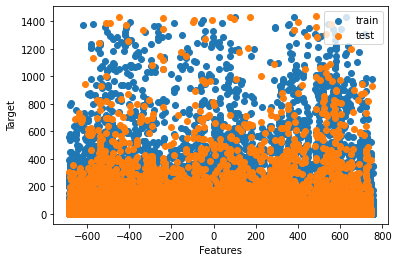

In [ ]:
plt.scatter(x_train_pca, y_train, label='train')
plt.scatter(x_test_pca, y_test, label='test')
plt.xlabel("Features")
plt.ylabel("Target")
plt.legend()
plt.show()

#### Delay vs Duration

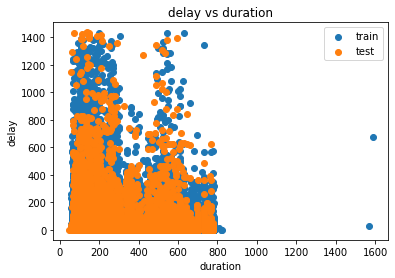

In [ ]:
plot_x_train = x_train['duration']
plot_x_test = x_test['duration']

plt.scatter(plot_x_train, y_train, label='train')
plt.scatter(plot_x_test, y_test, label='test')
plt.xlabel("duration")
plt.ylabel("delay")
plt.title("delay vs duration")
plt.legend()
plt.show()

### Outlier Detection & Removal

Considering the new features from the preproccessing, we can easily see that there cannot be any outliers in the features resultant from the one hot encoding. So we are left with three features. Both day of the year, and minute of the day cannot have outliers either because their ranges are known. Thus, the duration is the only feature that could have extreme values (outliers). Plotting the delay with respect to duration in the previous section has shown as well that there are obviously many extreme points in terms of the duration.

We also need to check the target (duration) if it contains outliers.

#### Detection

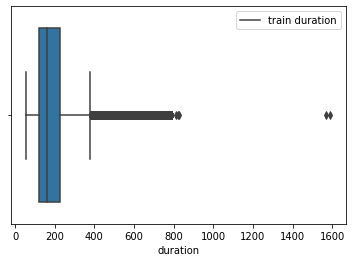

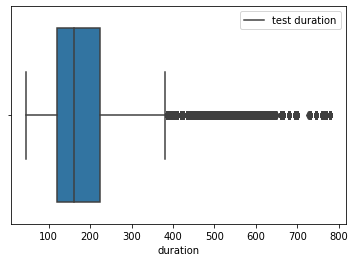

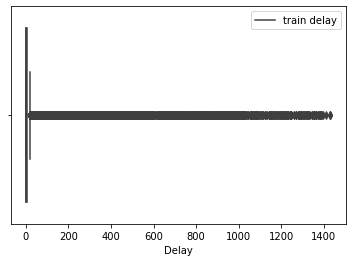

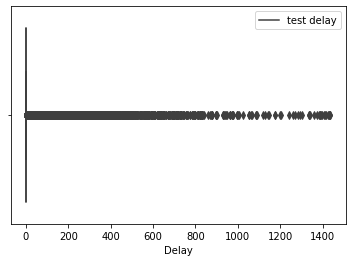

,Delay
count,176451.000000
mean,6.473639
std,40.034744
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1436.000000


In [ ]:
import seaborn as sns
sns.boxplot(x=x_train['duration'])
plt.legend(['train duration'])
plt.show()
sns.boxplot(x=x_test['duration'])
plt.legend(['test duration'])
plt.show()
sns.boxplot(x=y_train['Delay'])
plt.legend(['train delay'])
plt.show()
sns.boxplot(x=y_test['Delay'])
plt.legend(['test delay'])
plt.show()
y_test.describe()

In [ ]:
from scipy import stats

z_dur = np.abs(stats.zscore(x_train['duration']))
threshold = 3
ext_ind = np.where(z_dur >= threshold)
print("Train duration outliers:", end="")
print(len(ext_ind[0]))

Train duration outliers:14361


In [ ]:
z_del = np.abs(stats.zscore(y_train['Delay']))
ext_ind = np.where(z_del >= threshold)
print("Train delay outliers:", end="")
print(len(ext_ind[0]))

Train delay outliers:5877


In [ ]:
z_dur = np.abs(stats.zscore(x_test['duration']))
threshold = 3
ext_ind = np.where(z_dur >= threshold)
print("Test duration outliers:", end="")
print(len(ext_ind[0]))

Test duration outliers:6023


In [ ]:
z_del = np.abs(stats.zscore(y_test['Delay']))
ext_ind = np.where(z_del >= threshold)
print("Test delay outliers:", end="")
print(len(ext_ind[0]))

Test delay outliers:1829


#### Removal

Since the outliers in this columns do not excced 2% of the training set, we can remove all of them. 

In [ ]:
xy_train = pd.concat([x_train, y_train], axis=1)

z_dur = np.abs(stats.zscore(xy_train['duration']))
z_del = np.abs(stats.zscore(xy_train['Delay']))

filtered_entries = ((z_dur < threshold) & (z_del < threshold))
print(xy_train.shape)
xy_train = xy_train[filtered_entries]
print(xy_train.shape)

x_train, y_train = xy_train.drop(['Delay'], axis=1, inplace=False), xy_train[['Delay']]
print(x_train.shape, y_train.shape)

(499062, 340)
(479091, 340)
(479091, 339) (479091, 1)


In [ ]:
x_train.describe()

,Depature Airport_AAQ,Depature Airport_ABA,Depature Airport_AER,Depature Airport_AGP,Depature Airport_AKX,Depature Airport_ALA,Depature Airport_ALC,Depature Airport_AMS,Depature Airport_ARH,Depature Airport_ARN,Depature Airport_ASF,Depature Airport_ATH,Depature Airport_AYT,Depature Airport_BAX,Depature Airport_BCN,Depature Airport_BEG,Depature Airport_BEY,Depature Airport_BKK,Depature Airport_BLQ,Depature Airport_BRU,Depature Airport_BSL,Depature Airport_BUD,Depature Airport_CAI,Depature Airport_CAN,Depature Airport_CDG,Depature Airport_CEE,Depature Airport_CEK,Depature Airport_CGN,Depature Airport_CIT,Depature Airport_CPH,Depature Airport_DEL,Depature Airport_DOH,Depature Airport_DRS,Depature Airport_DUS,Depature Airport_DXB,Depature Airport_EGO,Depature Airport_EIN,Depature Airport_ERZ,Depature Airport_EVN,Depature Airport_FCO,...,Destination Airport_SKD,Destination Airport_SKG,Destination Airport_SLY,Destination Airport_SOF,Destination Airport_SPU,Destination Airport_STR,Destination Airport_STW,Destination Airport_SVO,Destination Airport_SVX,Destination Airport_SXF,Destination Airport_TAS,Destination Airport_TBS,Destination Airport_TFS,Destination Airport_TIV,Destination Airport_TJM,Destination Airport_TLL,Destination Airport_TLV,Destination Airport_TOF,Destination Airport_TRN,Destination Airport_TSE,Destination Airport_UFA,Destination Airport_ULN,Destination Airport_UUS,Destination Airport_VCE,Destination Airport_VIE,Destination Airport_VIT,Destination Airport_VKO,Destination Airport_VLC,Destination Airport_VNO,Destination Airport_VOG,Destination Airport_VOZ,Destination Airport_VST,Destination Airport_VVO,Destination Airport_WAW,Destination Airport_YKS,Destination Airport_ZAG,Destination Airport_ZRH,duration,Scheduled depature day,Scheduled depature minute
count,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.0,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.0,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,...,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.00000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000,479091.000000
mean,0.004440,0.001340,0.013210,0.002707,0.000814,0.003534,0.000991,0.004947,0.004605,0.003267,0.004076,0.002567,0.001977,0.002346,0.005179,0.003292,0.000785,0.0,0.003081,0.003229,0.000002,0.003429,0.000019,0.0,0.008191,0.000004,0.006631,0.000004,0.000687,0.003267,0.002987,0.000004,0.001553,0.006596,0.002866,0.000818,0.000002,0.000002,0.007487,0.006183,...,0.000284,0.001098,0.000447,0.001655,0.000511,0.001651,0.003459,0.495284,0.011898,0.008138,0.001737,0.002724,0.000843,0.002023,0.00583,0.003185,0.007955,0.003252,0.000008,0.002000,0.007381,0.001027,0.001755,0.003285,0.005636,0.000004,0.000004,0.001167,0.003081,0.007191,0.003607,0.000002,0.003260,0.004488,0.001373,0.001325,0.003306,183.728016,197.751818,754.266396
std,0.066483,0.036582,0.114175,0.051960,0.028520,0.059341,0.031472,0.070160,0.067701,0.057061,0.063717,0.050604,0.044416,0.048380,0.071776,0.057278,0.028004,0.0,0.055420,0.056733,0.001445,0.058461,0.004334,0.0,0.090130,0.002043,0.081162,0.002043,0.026196,0.057061,0.054571,0.002043,0.039377,0.080946,0.053457,0.028593,0.001445,0.001445,0.086204,0.078386,...,0.016846

In [ ]:
y_train.describe()

,Delay
count,479091.000000
mean,7.157525
std,17.134706
min,0.000000
25%,0.000000
50%,0.000000
75%,6.000000
max,150.000000


In [ ]:
x_test.iloc[:, -3:].describe()

,duration,Scheduled depature day,Scheduled depature minute
count,176451.000000,176451.000000,176451.000000
mean,193.861962,126.832424,750.146443
std,118.305307,70.059154,385.887213
min,45.000000,1.000000,0.000000
25%,120.000000,67.000000,455.000000
50%,160.000000,129.000000,765.000000
75%,225.000000,188.000000,1090.000000
max,780.000000,243.000000,1435.000000


In [ ]:
xy_test = pd.concat([x_test, y_test], axis=1)

threshold = 3

z_dur = np.abs(stats.zscore(xy_test['duration']))
z_del = np.abs(stats.zscore(xy_test['Delay']))

filtered_entries = ((z_dur < threshold) & (z_del < threshold))
print(xy_test.shape)
xy_test = xy_test[filtered_entries]
print(xy_test.shape)

x_test, y_test = xy_test.drop(['Delay'], axis=1, inplace=False), xy_test[['Delay']]
print(x_test.shape, y_test.shape)

(176451, 340)
(168729, 340)
(168729, 339) (168729, 1)


In [ ]:
x_test.iloc[:, -3:].describe()

,duration,Scheduled depature day,Scheduled depature minute
count,168729.000000,168729.000000,168729.000000
mean,178.877235,127.495860,752.256755
std,88.824978,69.934096,385.357186
min,45.000000,1.000000,5.000000
25%,120.000000,68.000000,465.000000
50%,160.000000,130.000000,770.000000
75%,215.000000,189.000000,1085.000000
max,545.000000,243.000000,1435.000000


In [ ]:
y_test.describe()

,Delay
count,168729.000000
mean,3.193091
std,11.764431
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,126.000000


#### Visualization after outliers removal

##### PCA

In [ ]:
pca1 = PCA(n_components=1)
x_train_pca = x_train - x_train.mean()
x_test_pca = x_test - x_test.mean()
x_train_pca = pca1.fit_transform(x_train_pca)
x_test_pca = pca1.transform(x_test_pca)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


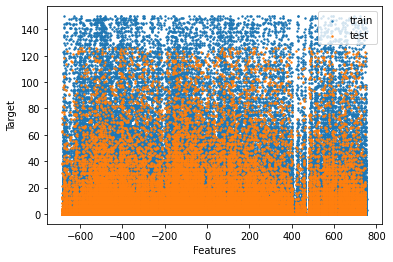

In [ ]:
plt.scatter(x_train_pca, y_train, label='train', s=2)
plt.scatter(x_test_pca, y_test, label='test', s=2)
plt.xlabel("Features")
plt.ylabel("Target")
plt.legend()
plt.show()

##### Delay vs duration

In [ ]:
plot_x_train = x_train['duration']
plot_x_test = x_test['duration']

plt.scatter(plot_x_train, y_train, label='train', s=2)
plt.scatter(plot_x_test, y_test, label='test', s=2)
plt.xlabel("duration")
plt.ylabel("delay")
plt.title("delay vs duration")
plt.legend()
plt.show()

### Machine learning models

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)
y_pred_train = linear_regression.predict(x_train)

# test set
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = mean_squared_error(y_test, y_pred, squared=False)

# train set
mse_linear_train = mean_squared_error(y_train, y_pred_train)
rmse_linear_train = mean_squared_error(y_train, y_pred_train, squared=False)

print("Test:")
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)

print("Train:")
print("MSE:", mse_linear_train)
print("RMSE:", rmse_linear_train)


Test:
MSE: 155.10269114264923
RMSE: 12.454023090658264
Train:
MSE: 285.06943410725785
RMSE: 16.88399935167192


#### Linear Regression on PCA

In [ ]:
pca1 = PCA(n_components=3)
x_train_pca = x_train - x_train.mean()
x_test_pca = x_test - x_test.mean()
x_train_pca = pca1.fit_transform(x_train_pca)
x_test_pca = pca1.transform(x_test_pca)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


linear_regression = LinearRegression()
linear_regression.fit(x_train_pca, y_train)
y_pred = linear_regression.predict(x_test_pca)
y_pred_train = linear_regression.predict(x_train_pca)

# test set
mse_linear_pca = mean_squared_error(y_test, y_pred)
rmse_linear_pca = mean_squared_error(y_test, y_pred, squared=False)

# train set
mse_linear_pca_train = mean_squared_error(y_train, y_pred_train)
rmse_linear_pca_train = mean_squared_error(y_train, y_pred_train, squared=False)

print("Test:")
print("MSE:", mse_linear_pca)
print("RMSE:", rmse_linear_pca)

print("Train:")
print("MSE:", mse_linear_pca_train)
print("RMSE:", rmse_linear_pca_train)


Test:
MSE: 154.39314786223102
RMSE: 12.425503927898902
Train:
MSE: 290.36325169731793
RMSE: 17.040048465227965


#### Linear Regression with Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge()
ridge.fit(x_train_pca, y_train)

y_pred = ridge.predict(x_test_pca)

y_pred_train = ridge.predict(x_train_pca)

# test set
mse_ridge = mean_squared_error(y_test, y_pred)
rmse_ridge = mean_squared_error(y_test, y_pred, squared=False)

# train set
mse_ridge_train = mean_squared_error(y_train, y_pred_train)
rmse_ridge_train = mean_squared_error(y_train, y_pred_train, squared=False)

print("Test:")
print("MSE:", mse_ridge)
print("RMSE:", rmse_ridge)

print("Train:")
print("MSE:", mse_ridge_train)
print("RMSE:", rmse_ridge_train)


Test:
MSE: 154.2326504590595
RMSE: 12.419043862514517
Train:
MSE: 289.5756141516386
RMSE: 17.016921406401295


#### Quadratic Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


poly_reg = PolynomialFeatures(degree=2)
X_poly_train = poly_reg.fit_transform(x_train[numeral_feats])

lin_reg = LinearRegression()

X_train = np.hstack((X_poly_train, x_train.drop(numeral_feats, axis=1)))

lin_reg.fit(X_train, y_train)

X_poly_test = poly_reg.transform(x_test[numeral_feats])
X_test = np.hstack((X_poly_test,x_test.drop(numeral_feats ,1)))

y_pred = lin_reg.predict(X_test)

y_pred_train = lin_reg.predict(X_train)

# test set
mse_quad = mean_squared_error(y_test, y_pred)
rmse_quad = mean_squared_error(y_test, y_pred, squared=False)

# train set
mse_quad_train = mean_squared_error(y_train, y_pred_train)
rmse_quad_train = mean_squared_error(y_train, y_pred_train, squared=False)

print("Test:")
print("MSE:", mse_quad)
print("RMSE:", rmse_quad)

print("Train:")
print("MSE:", mse_quad_train)
print("RMSE:", rmse_quad_train)


Test:
MSE: 150.7895840609102
RMSE: 12.279641039578893
Train:
MSE: 284.31029725043
RMSE: 16.86150341014792


#### Quadratic Regression on PCA

In [ ]:
pca1 = PCA(n_components=3)
x_train_pca = x_train - x_train.mean()
x_test_pca = x_test - x_test.mean()
x_train_pca = pca1.fit_transform(x_train_pca)
x_test_pca = pca1.transform(x_test_pca)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

polynomial_features = PolynomialFeatures(degree=2)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])
pipeline.fit(x_train_pca, y_train)

y_pred = pipeline.predict(x_test_pca)
y_pred_train = pipeline.predict(x_train_pca)

# test set
mse_quad_pca = mean_squared_error(y_test, y_pred)
rmse_quad_pca = mean_squared_error(y_test, y_pred, squared=False)

# train set
mse_quad_pca_train = mean_squared_error(y_train, y_pred_train)
rmse_quad_pca_train = mean_squared_error(y_train, y_pred_train, squared=False)

print("Test:")
print("MSE:", mse_quad_pca)
print("RMSE:", rmse_quad_pca)

print("Train:")
print("MSE:", mse_quad_pca_train)
print("RMSE:", rmse_quad_pca_train)


NameError: ignored

#### Quadratic Regression with Ridge

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


poly_reg = PolynomialFeatures(degree=2)
X_poly_train = poly_reg.fit_transform(x_train[numeral_feats])

lin_reg = Ridge()

X_train = np.hstack((X_poly_train, x_train.drop(numeral_feats, axis=1)))

lin_reg.fit(X_train, y_train)

X_poly_test = poly_reg.transform(x_test[numeral_feats])
X_test = np.hstack((X_poly_test,x_test.drop(numeral_feats ,1)))

y_pred = lin_reg.predict(X_test)

y_pred_train = lin_reg.predict(X_train)

# test set
mse_quad_ridge = mean_squared_error(y_test, y_pred)
rmse_quad_ridge = mean_squared_error(y_test, y_pred, squared=False)

# train set
mse_quad_ridge_train = mean_squared_error(y_train, y_pred_train)
rmse_quad_ridge_train = mean_squared_error(y_train, y_pred_train, squared=False)

print("Test:")
print("MSE:", mse_quad_ridge)
print("RMSE:", rmse_quad_ridge)

print("Train:")
print("MSE:", mse_quad_ridge_train)
print("RMSE:", rmse_quad_ridge_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.78151e-18): result may not be accurate.
  overwrite_a=True).T


Test:
MSE: 150.74196392469094
RMSE: 12.277701899162194
Train:
MSE: 284.3317550840917
RMSE: 16.86213969471525


### Analysis 

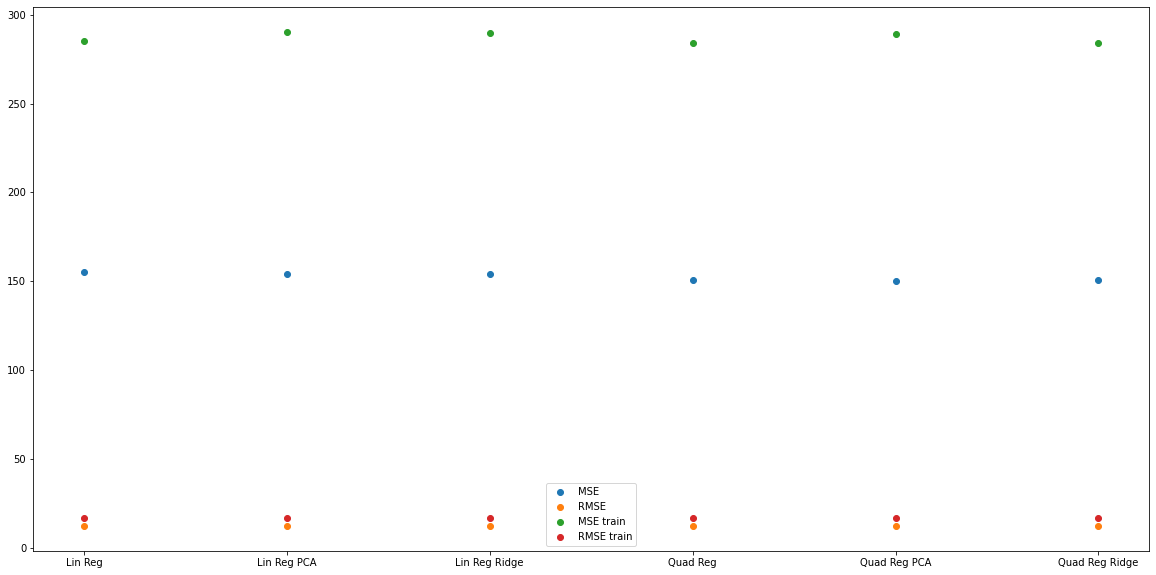

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(['Lin Reg', 'Lin Reg PCA', 'Lin Reg Ridge', 'Quad Reg', 'Quad Reg PCA', 'Quad Reg Ridge'], 
            [mse_linear, mse_linear_pca, mse_ridge, mse_quad, mse_quad_pca, mse_quad_ridge])
plt.scatter(['Lin Reg', 'Lin Reg PCA', 'Lin Reg Ridge', 'Quad Reg', 'Quad Reg PCA', 'Quad Reg Ridge'], 
            [rmse_linear, rmse_linear_pca, rmse_ridge, rmse_quad, rmse_quad_pca, rmse_quad_ridge])
plt.scatter(['Lin Reg', 'Lin Reg PCA', 'Lin Reg Ridge', 'Quad Reg', 'Quad Reg PCA', 'Quad Reg Ridge'], 
            [mse_linear_train, mse_linear_pca_train, mse_ridge_train, mse_quad_train, mse_quad_pca_train, mse_quad_ridge_train])
plt.scatter(['Lin Reg', 'Lin Reg PCA', 'Lin Reg Ridge', 'Quad Reg', 'Quad Reg PCA', 'Quad Reg Ridge'], 
            [rmse_linear_train, rmse_linear_pca_train, rmse_ridge_train, rmse_quad_train, rmse_quad_pca_train, rmse_quad_ridge_train])
plt.legend(['MSE', 'RMSE', 'MSE train', 'RMSE train'])

plt.show()


From the previous chart and the error values, we can conclude that using quadratic regression produced the best results according to the mean square error metric. However, the difference in the performances was insignificant between the different models. 

Generally speaking all the models achieved satisfactory results having MSE of the range [149, 155]. 